In [27]:
from typing import Dict
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.stats import poisson
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx #for the powerlaw network
import csv

In [34]:
data1 = pd.read_csv("sim_v12_1.4_2_0.005_0.0025.txt", sep=" ", header=None)
data1.columns = ["iter", "size", "a", "d"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
max_siz = max(sizes1)
counts_norm1 = counts1/max_val

data2 = pd.read_csv('cascade_distribution_de.csv', delim_whitespace=True)
x=data2.loc[:,"Size"]
y=data2.loc[:,"number"]
norm_y = y
max_val2 = max(y)
norm_y = norm_y/max_val2

max_x = max(data2.loc[:,"Size"])

In [37]:
print(y[0]/y[8])

207.11963297262255


In [23]:
resul1 = np.array(list(stats.ks_2samp(norm_y[0:60], counts_norm1[0:60], alternative='two-sided')))

In [24]:
print(resul1)

[0.31666667 0.00462714]


In [48]:
data2 = pd.read_csv('cascade_distribution_de.csv', delim_whitespace=True)
y=data2.loc[:,"number"]*sum(sizes1)/np.sum(data2.loc[:,"number"])
y=data2.loc[:,"number"]
norm_y = y
max_val2 = max(y)
norm_y = norm_y/max_val2

max_x = max(data2.loc[:,"Size"])

arr1 = [1.4, 2.6, 3.7, 5.1, 7, 8.3]#f1
arr2 = [2, 3.1, 4.6, 6.3, 7.8]#f2
arr3 = [0.005, 0.0074, 0.0116, 0.0164, 0.0226, 0.0253]#s1
arr4 = [0.0025, 0.0065, 0.0096, 0.0149, 0.0182, 0.021, 0.0239]#s2

arr5 = [0.6, 1.4, 2.6, 3.7, 5.1]#f1
arr6 = [0.6, 2, 3.1, 4.6, 6.3]#f2
arr7 = [0.05, 0.074, 0.116, 0.164, 0.253, 0.5, 0.74, 1.16]#s1
arr8 = [0.065, 0.096, 0.149, 0.21, 0.25, 0.65, 0.96, 1.49]#s2


ct = 0

for x in tqdm(arr5):
    for y in arr6:
        for w in arr7:
            for z in arr8:
                
                try:
                    g = open("sim_ks_scores2.txt", "a")
                
                    data1 = pd.read_csv(f"sim_v12_{x}_{y}_{w}_{z}.txt", sep=" ", header=None)
                    data1.columns = ["iter", "size", "a", "d"]
                    counter1 = Counter(data1['size'])
                    sizes1 = np.array(list(counter1.keys()))
                    counts1 = np.array(list(counter1.values()))
                    max_val = max(counts1)
                    max_siz = max(sizes1)
                    counts_norm1 = counts1/max_val
                
                    resul1 = np.array(list(stats.ks_2samp(norm_y[0:60], counts_norm1[0:60], alternative='two-sided')))
                    L = [str(ct), " ", str(x), " ", str(y), " ", str(w), " ", str(z), " ", str(resul1[0]), " ", str(resul1[1]), "\n"]
                    g.writelines(L)
                    g.close()
                
                    ct=ct+1
                except:
                    pass
                
                

100%|██████████| 5/5 [00:51<00:00, 10.26s/it]


In [50]:
data = pd.read_csv('sim_ks_scores2.txt', sep=" ", header=None)
data.columns = ["it", "x", "y", "w", "z", "ks", "p"]
data.head()

,it,x,y,w,z,ks,p
0,0,0.6,0.6,0.05,0.065,0.533333,3.651522e-08
1,1,0.6,0.6,0.05,0.096,0.533333,3.651522e-08
2,2,0.6,0.6,0.05,0.149,0.366667,5.569711e-04
3,3,0.6,0.6,0.05,0.210,0.333333,2.371411e-03
4,4,0.6,0.6,0.05,0.250,0.400000,1.123209e-04


In [51]:
print(len(data))

1558


In [52]:
data_sort = data.sort_values(by=['ks'], ascending=True)

In [59]:
data_sort.head(50)

,it,x,y,w,z,ks,p
1148,1148,3.7,4.6,0.253,0.960,0.094444,0.961793
6,6,0.6,0.6,0.050,0.960,0.100000,0.928437
1468,1468,5.1,4.6,0.253,0.960,0.108333,0.922193
738,738,2.6,3.1,0.074,0.250,0.112162,0.894933
421,421,1.4,2.0,0.253,0.650,0.116667,0.813281
5,5,0.6,0.6,0.050,0.650,0.116667,0.813281
1157,1157,3.7,4.6,0.500,1.490,0.116667,0.813281
119,119,0.6,2.0,0.740,1.490,0.116667,0.813281
1459,1459,5.1,4.6,0.164,0.650,0.126190,0.824106
1469,1469,5.1,4.6,0.253,1.490,0.127083,0.837358


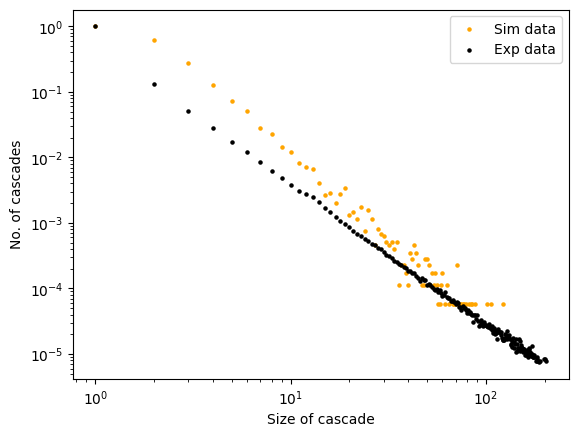

In [56]:
import pandas as pd
import numpy as np
import random
from random import choices
import pdb
import matplotlib.pyplot as plt
from scipy.stats import gengamma
from collections import Counter
import math
import matplotlib.pyplot as plt

#SIMULATION DATA
data1 = pd.read_csv('sim_v12_1.4_2_0.116_0.25.txt', sep=" ", header=None)
data1.columns = ["iter", "size", "a_i", "d"]
counter1 = Counter(data1['size'])
sizes1 = np.array(list(counter1.keys()))
counts1 = np.array(list(counter1.values()))
max_val = max(counts1)
counts_norm1 = counts1/max_val
plt.scatter(sizes1,counts_norm1, color="orange", s=5, label = 'Sim data')

#EXPERIMENTAL DATA
data2 = pd.read_csv('cascade_distribution_de.csv', delim_whitespace=True)
x=np.array(data2.loc[:,"Size"])
y=data2.loc[:,"number"]
norm_y = y
max_val2 = max(y)
norm_y = norm_y/max_val2
plt.scatter(x, norm_y, color="black", s=5, label = 'Exp data')

#AESTHETIC CHANGES
plt.legend(scatterpoints=1, loc='upper right')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Size of cascade")
plt.ylabel("No. of cascades")
#plt.savefig("sim_v6_3.png")
plt.show()

In [43]:
3.7_4.6_0.0116_0.0182

TypeError: 'DataFrame' object is not callable